# Lecture3_Exercises

## Economics dataset analysis

The folder economics (~/DSE200/DSE200/data/economics/) has a set of small datasets corresponding to different economics topics. We will use Pandas to incorporate these datasets into our workflow, merge them and analyze the economic trends as a function of time.

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes and the values are the Series from each downloaded file
3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. HINT: `term_premium = merged_data[’GS10’] - merged_data[’GS1’]` and `default_premium = merged_data[’BAA’] - merged_data[’AAA’]`
4. Process the data
5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.

Note: Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following

1. dropping the rows with null values
2. Output data regularly to see if they are following regular format. Use pandas.series.pct_change wherever necessary

**The codes and their corresponding series representation**

                            Series                   Code           Frequency
                            Real GDP                 GDPC1          Quarterly
                            Industrial Production   INDPRO          Quarterly
                            Core CPI               CPILFESL         Monthly
                            Unemployment Rate       UNRATE          Monthly
                            10 Year Yield            GS10           Monthly
                            1 Year Yield             GS1            Monthly
                            Baa Yield                BAA            Monthly
                            Aaa Yield                AAA            Monthly
                            
** Variable Description **

                            Series                        Description
                            Treated                       Dummy indicating whether the candidate received the treatment
                            Age                           Age in years
                            Education (years)             Years of Education
                            Black                         Dummy indicating African-American
                            Hispanic                      Dummy indicating Hispanic
                            Married                       Dummy indicating married
                            Real income Before ($)        Income before program
                        Real income After ($)         Income after program           


In [12]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
codes = ["AAA", "BAA", "CPILFESL", "GDPC1", "GS1", "GS10", "INDPRO", "UNRATE"]

merged_data = pd.DataFrame()

dataframes=[]
for code in codes: 
    df = pd.read_csv("../data/economics/" + code + ".csv", keep_date_col=True, header=0, names=["date", code], parse_dates=["date"], index_col="date")
    merged_data = merged_data.merge(df, how="outer", left_index=True, right_index=True)

#merged_data = pd.concat(data_indexed, axis = 1) this works too
print shape(merged_data) #(1149, 8)
merged_data.head()


(1149, 8)


,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE
date,,,,,,,,
1919-01-01,5.35,7.12,NaN,NaN,NaN,NaN,4.8582,NaN
1919-02-01,5.35,7.20,NaN,NaN,NaN,NaN,4.6435,NaN
1919-03-01,5.39,7.15,NaN,NaN,NaN,NaN,4.5092,NaN
1919-04-01,5.44,7.23,NaN,NaN,NaN,NaN,4.5898,NaN
1919-05-01,5.39,7.09,NaN,NaN,NaN,NaN,4.6166,NaN


In [14]:
term_premium = merged_data["GS10"] - merged_data["GS1"]
term_premium.head()

date
1919-01-01   NaN
1919-02-01   NaN
1919-03-01   NaN
1919-04-01   NaN
1919-05-01   NaN
dtype: float64

In [15]:
default_premium = merged_data["BAA"] - merged_data["AAA"]
default_premium.head()

date
1919-01-01    1.77
1919-02-01    1.85
1919-03-01    1.76
1919-04-01    1.79
1919-05-01    1.70
dtype: float64

date
2013-12-01    101.5572
2014-01-01    101.3061
2014-02-01    102.2567
2014-03-01    103.1059
2014-04-01    103.1885
2014-05-01    103.6619
2014-06-01    103.9503
2014-07-01    104.1916
2014-08-01    104.0187
2014-09-01    105.0728
Name: INDPRO, dtype: float64


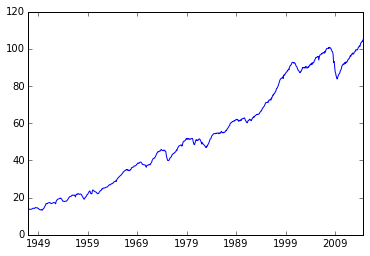

In [16]:
# Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences

gdp_y = merged_data.loc["1947-01-01":]["INDPRO"].dropna() #all rows after 1947 and drop NaNs
print gdp_y.tail(10)

y = gdp_y
plt.plot_date(gdp_y.index, gdp_y, "-")

date
2012-01-01    15275.0
2012-04-01    15336.7
2012-07-01    15431.3
2012-10-01    15433.7
2013-01-01    15538.4
2013-04-01    15606.6
2013-07-01    15779.9
2013-10-01    15916.2
2014-01-01    15831.7
2014-04-01    16010.4
Name: GDPC1, dtype: float64


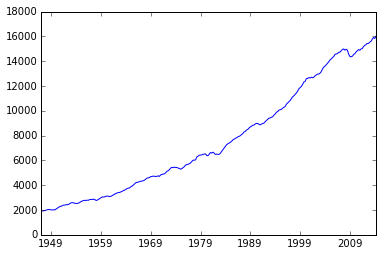

In [17]:
# Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences

gdp_y = merged_data.loc["1947-01-01":]["GDPC1"].dropna() #all rows after 1947 and drop NaNs
print gdp_y.tail(10)

y = gdp_y
plt.plot_date(gdp_y.index, gdp_y, "-")

### Infernaces

It seems on average GDP always increases

date
2013-12-01    6.7
2014-01-01    6.6
2014-02-01    6.7
2014-03-01    6.7
2014-04-01    6.3
2014-05-01    6.3
2014-06-01    6.1
2014-07-01    6.2
2014-08-01    6.1
2014-09-01    5.9
Name: UNRATE, dtype: float64


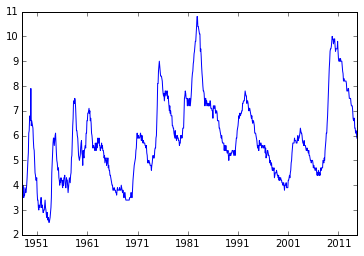

In [18]:
# Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences

unrate = merged_data.loc["1948-01-01":]["UNRATE"].dropna() #all rows after 1947 and drop NaNs
print unrate.tail(10)

plt.plot_date(unrate.index, unrate, "-")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126ee8210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12738fb50>]], dtype=object)

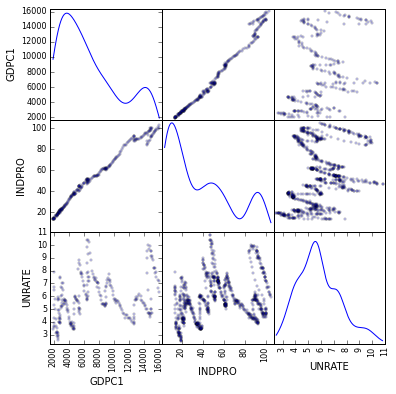

In [19]:
pd.scatter_matrix(merged_data[["GDPC1", "INDPRO", "UNRATE"]], alpha=0.2, figsize=(6, 6), diagonal='kde')

### Infereneces

The unemployment rate is very volitile, but opperates on a periodic cycle. The latest data suggestes we are approching the trough of a down cycle, therefore we should prepare of a perdiod on increased unemployment in the next year or two. 

## Nutrition dataset analysis

Download the dataset from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip
This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

Do the following

Use the built in python json module to load the food data into a python list

Your code should look like this

```
import json
db = json.load(open('foods-2011-10-03.json'))
```

db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do

`nuts = nuts.drop_duplicates()`

Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers). 

Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns.

Using the foods DataFrame you have been building, compute the following things:

1. The food item with the highest content of each nutrient.
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work. 

In [20]:
import json
db = json.load(open('../data/foods-2011-10-03.json'))

In [21]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [22]:
db[0]['nutrients'][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

In [23]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [24]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [25]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
dtype: int64

In [26]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)


nutrients = nutrients.drop_duplicates()

col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.head()

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [27]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.head()

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [28]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.tail()

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
375171,"Vitamin B-12, added",Vitamins,mcg,0.000,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,Cholesterol,Other,mg,0.000,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,"Fatty acids, total saturated",Other,g,0.072,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,"Fatty acids, total monounsaturated",Other,g,0.028,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375175,"Fatty acids, total polyunsaturated",Other,g,0.041,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


In [29]:
ndata[ndata["food"]=="Cheese, caraway"]
ndata.ix[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [30]:
max_by_nut = ndata.groupby(["nutrient"]).max()[["food", "value"]]
max_by_nut.head()

,food,value
nutrient,,
Adjusted Protein,"Mushrooms, white, raw",12.900
Alanine,"Yogurt, vanilla, low fat, 11 grams protein per...",8.009
"Alcohol, ethyl","Yogurt, vanilla, low fat, 11 grams protein per...",42.500
Arginine,"Yogurt, vanilla, low fat, 11 grams protein per...",7.436
Ash,"Yogurt, vanilla, low fat, 11 grams protein per...",72.500


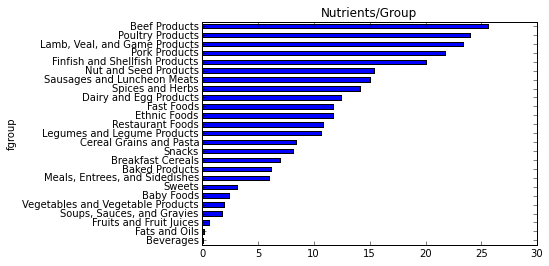

In [31]:
# A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of
# the amount of that nutrient in each food group. Provide a plot title. 
# HINT: You will need to use the quantile and sort (or order ) methods in order for this to work.



def gen_bar(nutrient_name='Protein', quantile_val=0.5):
    result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(quantile_val)
    result[nutrient_name].order().plot(kind='barh', title="Nutrients/Group")
    
gen_bar()

In [32]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]
max_foods

value  \
nutgroup    nutrient                                     
Amino Acids Alanine                              8.009   
            Arginine                             7.436   
            Aspartic acid                       10.203   
            Cystine                              1.307   
            Glutamic acid                       17.452   
            Glycine                             19.049   
            Histidine                            2.999   
            Hydroxyproline                       0.803   
            Isoleucine                           4.300   
            Leucine                              7.200   
            Lysine                               6.690   
            Methionine                           1.859   
            Phenylalanine                        4.600   
            Proline                             12.295   
            Serine                               4.600   
            Threonine                            3.300   
            Tryptophan                           1.600   
            Tyrosine                             3.300   
            Valine                               4.500   
Composition Adjusted Protein                    12.900   
            Carbohydrate, by difference        100.000   
            Fiber, total dietary                79.000   
            Protein                             88.320   
            Sugars, total                       99.800   
            Total lipid (fat)                  100.000   
            Water                              100.000   
Elements    Calcium, Ca                       7364.000   
            Copper, Cu                          15.050   
            Fluoride, F                        584.000   
            Iron, Fe                            87.470   
...                                                ...   
Vitamins    Cryptoxanthin, beta               6186.000   
            Dihydrophylloquinone               103.800   
            Folate, DFE                       2630.000   
            Folate, food                      2340.000   
            Folate, total                     2340.000   
            Folic acid                        1538.000   
            Lutein + zeaxanthin              39550.000   
            Lycopene                         46260.000   
            Menaquinone-4                       33.200   
            Niacin                              97.000   
            Pantothenic acid                    35.000   
            Retinol                          30000.000   
            Riboflavin                          14.300   
            Thiamin                             20.000   
            Tocopherol, beta                     6.490   
            Tocopherol, delta                   30.880   
            Tocopherol, gamma                  100.880   
            Vitamin A, IU                   100000.000   
            Vitamin A, RAE                   30000.000   
            Vitamin B-12                        98.890   
            Vitamin B-12, added                 24.000   
            Vitamin B-6                         12.000   
            Vitamin C, total ascorbic acid    2400.000   
            Vitamin D                        10000.000   
            Vitamin D (D2 + D3)                250.000   
            Vitamin D2 (ergocalciferol)         28.100   
            Vitamin D3 (cholecalciferol)        27.400   
            Vitamin E (alpha-tocopherol)       149.400   
            Vitamin E, added                    46.550   
            Vitamin K (phylloquinone)         1714.500   

                                                                                         food  
nutgroup    nutrient                                                                           
Amino Acids Alanine                                         Gelatins, dry powder, unsweetened  
            Arginine                                             Seeds, sesame flour, low-fat  
          

## Classifying Digits
SKLearn has many intereting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()

And the images can be visualized as follows

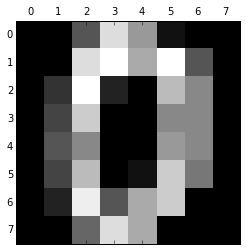

In [34]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show() 

1. Visualize the first 15 digits to get a better understanding of the data
2. With x as data and y as target, classify the above datasets into individual targets using a decision tree
3. Perform this classification task with sklearn.svm.SVC. How does the choice of kernel affect the results?
4. Perform this classification task with sklearn.ensemble.RandomForestClassifier. Write in the markdown below the impact each of the parammeter had on the result


* max_depth: The default is none, meaning a very large number. The closer you set it to 0, the lower the accuracy goes. Most of the time, it is recommended to prune (limit the depth of) the trees if you are dealing with noisy data.
* max_features: The size of the random subsets of features to consider when splitting a node. These are the maximum number of features Random Forest is allowed to try in individual tree. Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered. However, this is not necessarily true as this decreases the diversity of individual tree which is the USP of random forest. But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features.
* n_estimators: Represents the # of trees in the forest. This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.



Try a few sets of parameters for each model and check the F1 score (sklearn.metrics.f1_score) on your results. Output the best F1 score that you achieve. 



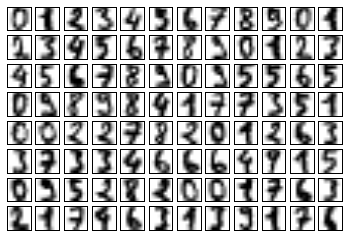

In [35]:
fig, ax = plt.subplots(8, 12, subplot_kw={'xticks':[], 'yticks':[]})

for i in range(ax.size):
    ax.flat[i].imshow(digits.data[i].reshape(8, 8),
                      cmap=plt.cm.binary)

In [36]:
from sklearn.cross_validation import train_test_split
features_train, features_test, targets_train, targets_test = train_test_split(digits.data,digits.target, test_size=0.4, random_state=4)

### Decision Tree

In [37]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(features_train, targets_train)

In [38]:
zero_digit = digits.data[5]

target_id = decision_tree.predict(zero_digit)
digits.target[target_id][0]

9

#### Score

In [39]:
decision_tree.score(features_test, targets_test)

0.84144645340751045

### SVC

In [40]:
from sklearn.svm import SVC

svc_clf = SVC(kernel="poly")
svc_clf = svc_clf.fit(features_train, targets_train)

In [41]:
zero_digit = digits.data[5]

target_id = svc_clf.predict(zero_digit)
digits.target[target_id][0]

9

In [42]:
svc_clf.score(features_test, targets_test)

0.98609179415855353

Automatically created module for IPython interactive environment


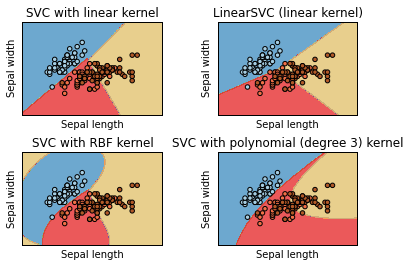

In [43]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### How does the choice of kernel affect the results?

Kernels are functions that take a low dimensional input space or feature space and map it to a very high dimensional input space so taht what used to be not linearly seperable and turns it into a seperable problem. In other words you try to find a linerly sperable solution in a higher dimensioanl space and then apply that function in the orignial input space often resulting in a non-linear decision boundary.

Classes are not always separable by a hyperplane, so it would be desirable to have a decision function that is not linear but that may be for instance polynomial or exponential:

SVC kernel choices are: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’.

* A linear kernel will always give me a linear decision boundry.
* Poly kernel has best results and gives a polynomial decision boundry

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# param defaults
# max_depth=None
# max_features="auto"
# n_estimators=10
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf = rf_clf.fit(features_train, targets_train)

In [45]:
zero_digit = digits.data[5]

target_id = rf_clf.predict(zero_digit)
digits.target[target_id][0]

9

In [46]:
rf_clf.score(features_test, targets_test)

0.97079276773296241

### F1 Scores

In [47]:
from sklearn.metrics import f1_score

#### Decision Tree

In [48]:
y_pred =  decision_tree.predict(features_test)
f1_score(targets_test, y_pred, average='macro') 

0.83990631680183936

#### SVC

In [49]:
svc_pred =  svc_clf.predict(features_test)
f1_score(targets_test, svc_pred, average='macro') 

0.98606135027225528

#### Random Forest

In [50]:
rf_pred =  rf_clf.predict(features_test)
f1_score(targets_test, rf_pred, average='macro') 

0.97036821948550056

## Dimensionality Reduction - PCA

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. 

Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). 
Use the sklearn inbuilt tool sklearn.decomposition.PCA

Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the ammount of information thrown away and plot the variance(cumulative) against the number of components  

Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA  as well 
(this extended analysis need not be submitted as part of homework)


In [51]:
from sklearn.decomposition import PCA

In [55]:
#shape before
print shape(features_train)

(1078, 64)


In [53]:
pca = PCA(n_components=None)
pca.fit(features_train)

PCA(copy=True, n_components=None, whiten=False)

In [56]:
pca.components_

array([[ -1.79167142e-18,   1.34969911e-02,   1.95749380e-01, ...,
          1.39531275e-01,   4.71913307e-02,   1.05639820e-02],
       [  3.01612323e-18,  -1.08700089e-02,  -9.89835658e-02, ...,
          1.67714020e-01,   1.80375683e-02,  -7.87539990e-03],
       [ -1.10259167e-18,  -1.63139346e-02,  -1.26594782e-01, ...,
         -2.14948506e-01,  -1.50682102e-01,  -3.09692558e-02],
       ..., 
       [  0.00000000e+00,  -1.45716772e-16,  -4.46735298e-17, ...,
         -9.36750677e-17,   2.77555756e-17,   1.31838984e-16],
       [  0.00000000e+00,   1.12323345e-16,   5.04820380e-17, ...,
          1.68159757e-16,   1.56125113e-17,  -1.26201133e-16],
       [  1.00000000e+00,   8.31799413e-18,  -1.52931010e-17, ...,
         -8.38335201e-18,   1.33693789e-17,   2.94548150e-18]])

In [57]:
pca.explained_variance_ratio_

array([  1.45503665e-01,   1.37957175e-01,   1.15923839e-01,
         8.62544772e-02,   5.63299162e-02,   4.97902845e-02,
         4.27436832e-02,   3.54890056e-02,   3.37004245e-02,
         3.16640876e-02,   2.47577135e-02,   2.28108109e-02,
         1.88051595e-02,   1.81625127e-02,   1.50249268e-02,
         1.44173925e-02,   1.30230534e-02,   1.26017349e-02,
         1.04263258e-02,   9.28939839e-03,   8.90700874e-03,
         8.33537470e-03,   7.59241278e-03,   7.26764273e-03,
         7.10974862e-03,   6.11948024e-03,   5.51968465e-03,
         5.20508862e-03,   4.65137146e-03,   4.19554480e-03,
         3.74697780e-03,   3.56235313e-03,   3.45468540e-03,
         3.28487087e-03,   3.08747240e-03,   2.84478519e-03,
         2.57364109e-03,   2.30821724e-03,   2.16769396e-03,
         2.03016393e-03,   1.82866175e-03,   1.53606071e-03,
         1.47901527e-03,   1.42041708e-03,   1.12714354e-03,
         1.05310377e-03,   9.66250461e-04,   6.44858159e-04,
         4.62297165e-04,

So vector 1 counts for 14% of the variation and vector 2 counts for 13% and so on, with the last two vectors counting for almost 0 percent variation. So the cumulative chart below: 

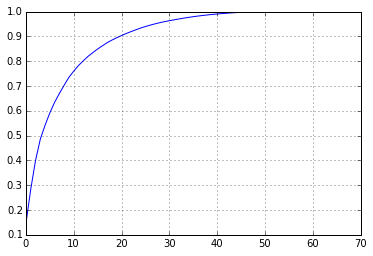

In [58]:
cumulative_explained = cumsum(pca.explained_variance_ratio_) 
plot(cumulative_explained);
grid()

In [59]:
pca.explained_variance_

array([  1.74905570e+02,   1.65834162e+02,   1.39348552e+02,
         1.03683907e+02,   6.77124945e+01,   5.98514003e+01,
         5.13808932e+01,   4.26602640e+01,   4.05102645e+01,
         3.80624454e+01,   2.97605013e+01,   2.74201882e+01,
         2.26051155e+01,   2.18326091e+01,   1.80610116e+01,
         1.73307130e+01,   1.56546199e+01,   1.51481657e+01,
         1.25331720e+01,   1.11665058e+01,   1.07068468e+01,
         1.00197027e+01,   9.12661057e+00,   8.73621428e+00,
         8.54641452e+00,   7.35604276e+00,   6.63504656e+00,
         6.25688014e+00,   5.59127344e+00,   5.04333795e+00,
         4.50412908e+00,   4.28219733e+00,   4.15277319e+00,
         3.94864426e+00,   3.71135752e+00,   3.41963053e+00,
         3.09369639e+00,   2.77463838e+00,   2.60571958e+00,
         2.44039887e+00,   2.19817918e+00,   1.84645228e+00,
         1.77787968e+00,   1.70744056e+00,   1.35490528e+00,
         1.26590431e+00,   1.16150056e+00,   7.75164556e-01,
         5.55713488e-01,

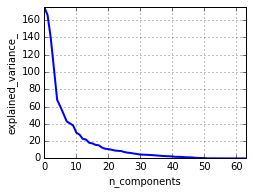

In [60]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
grid()

From the `explained_variance` data and the chart above, it is clear that at some point between 30 and 40 vectors our data looses any significance. Let's choose `35` vectors for our PCA reduction:

In [62]:
pca.n_components = 35
features_train_reduced = pca.fit_transform(features_train)
features_test_reduced = pca.fit_transform(features_test)

In [63]:
#shape after
features_train_reduced.shape

(1078, 35)

We chose the first 35 vectors as our new, reduced feature set this accounts for roughly 97.6% of the data as shown below:

In [ ]:
pca.explained_variance_ratio_[:35].sum()

And the disgarded vectors account for roughly %2 of the variance:

In [ ]:
pca.explained_variance_ratio_[35:].sum()

Through PCA we were able to reduce the number of features in our training set to 35 from 64 resulting in 54% of the information thrown away. So we cut the data by over %50 but still maintained 97.6% of the information.